In [3]:
# import libery
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns , warnings
warnings.filterwarnings("ignore")

In [4]:
# Load Dataset
df = pd.read_excel ('online_retail.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# check Dataset row and colums 
df.shape

(525461, 8)

In [6]:
# Check Data set some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
# check dataset null value
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
# fill null value 
df['Customer ID'].fillna ( df['Customer ID'].ffill(), inplace= True)

In [9]:
# Convert datatime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
# fill null value 
df['Description'].fillna ('Unknown' , inplace = True)

# Data Analysis


<h3>1) What were the total sales and income per month?</h3>

In [11]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

In [12]:
monthly_sales = df.groupby('YearMonth').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Income=('Price', 'sum')
).reset_index()

In [13]:
monthly_sales

,YearMonth,Total_Quantity,Total_Income
0,2009-12,420088,198307.760
1,2010-01,375363,165671.362
2,2010-02,368402,116774.536
3,2010-03,489370,268304.241
4,2010-04,351971,120708.372
5,2010-05,364095,142885.530
6,2010-06,388253,234869.690
7,2010-07,302201,100650.900
8,2010-08,451803,157778.090
9,2010-09,478262,223763.221


In [14]:
monthly_sales = df.groupby('YearMonth').agg(
    Total_Sales =('Quantity','sum'),
    Total_Income =('Price','sum')
).reset_index()

In [15]:
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

In [16]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   YearMonth     13 non-null     datetime64[ns]
 1   Total_Sales   13 non-null     int64         
 2   Total_Income  13 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 444.0 bytes


<h3>Total Sales Per Month Line Chart</h3>

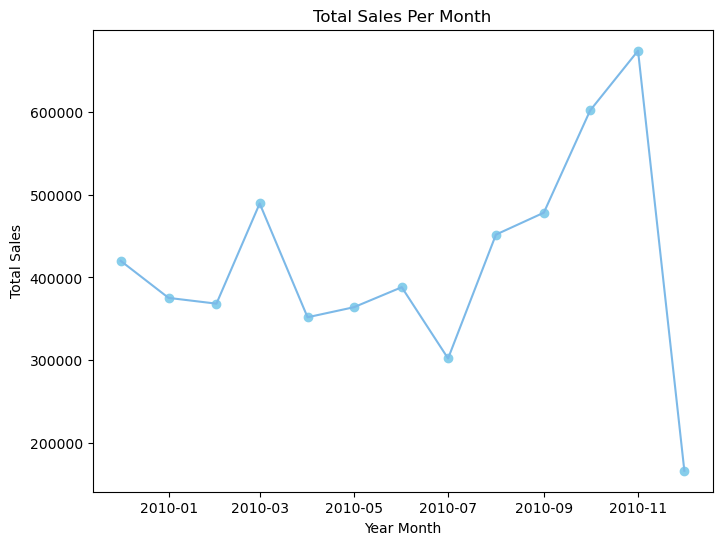

In [17]:
plt.figure(figsize=(8,6))
sns.lineplot(monthly_sales, x = 'YearMonth' , y = 'Total_Sales' , color = '#7CB9E8')
plt.scatter(monthly_sales['YearMonth'] , monthly_sales['Total_Sales'] , color = '#87CEEB')
plt.title('Total Sales Per Month')
plt.xlabel('Year Month')
plt.ylabel('Total Sales')
plt.show()

<h3>Total Income Per Month Line Chart</h3>

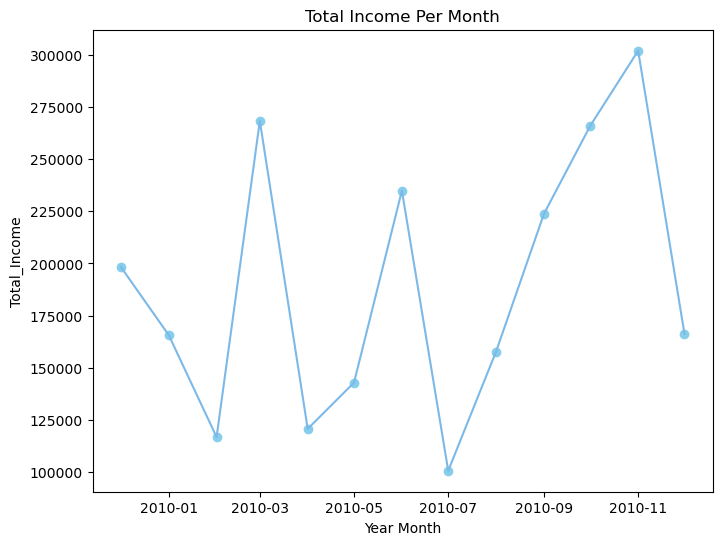

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(monthly_sales, x = 'YearMonth' , y = 'Total_Income' , color = '#7CB9E8')
plt.scatter(monthly_sales['YearMonth'] , monthly_sales['Total_Income'] , color = '#87CEEB')
plt.title('Total Income Per Month')
plt.xlabel('Year Month')
plt.ylabel('Total_Income')
plt.show()

<h3>2)Which month has the highest income?</h3>

In [19]:
df['Total Income'] = df['Quantity'] * df['Price']

In [20]:
month_of_highest_income = df.groupby('YearMonth')[['Total Income']].sum()

In [21]:
month_of_highest_income.idxmax()

Total Income    2010-11
dtype: period[M]

In [22]:
# Showing the highest income period for both months and total income
month_of_highest_income.loc[month_of_highest_income.idxmax()]

,Total Income
YearMonth,
2010-11,1422654.642


<h3>Highest monthly income Plot</h3>

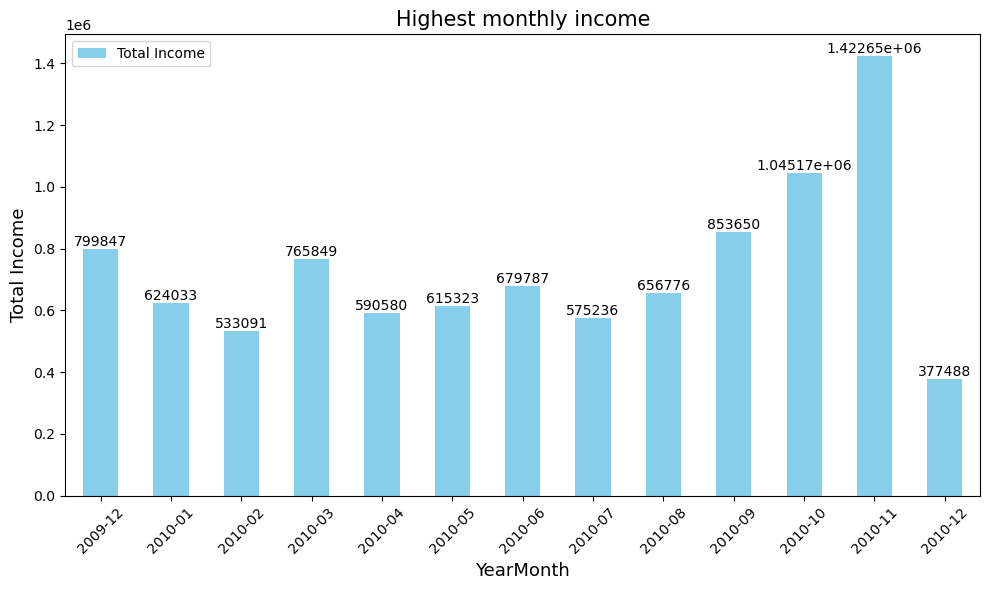

In [23]:
data = month_of_highest_income.plot(kind = 'bar' , color = 'skyblue' , figsize=(10,6))
plt.title('Highest monthly income', fontsize = 15)
plt.xlabel('YearMonth' , fontsize = 13 )
plt.ylabel('Total Income' , fontsize = 13)
plt.xticks(rotation = 45)
for i in data.containers:
    data.bar_label(i)
plt.tight_layout()
plt.show()

<h3>3) What day of the week costs the most?</h3>

In [24]:
df['Data of Week'] = df['InvoiceDate'].dt.day_name()

In [25]:
day_of_highest_income = df.groupby('Data of Week')[['Total Income']].sum()

In [26]:
day_of_highest_income.loc[day_of_highest_income.idxmax()]

,Total Income
Data of Week,
Thursday,1882513.012


<h3>The most expensive day of the week</h3>

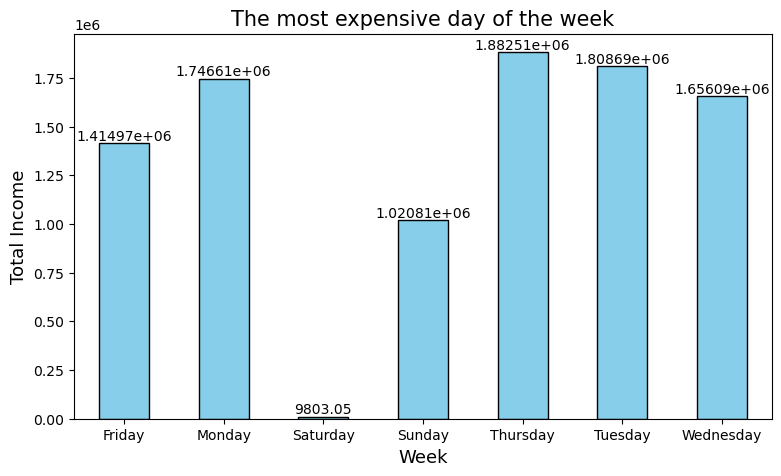

In [27]:
data = day_of_highest_income.plot(kind = 'bar' , color = 'skyblue',figsize = (9,5), edgecolor = 'black')
plt.ylabel('Total Income', fontsize = 13)
plt.xlabel('Week' , fontsize = 13)
plt.xticks(rotation=0)
plt.title('The most expensive day of the week' , fontsize = 15)
for i in data.containers:
    data.bar_label(i)
lef = plt.legend(loc="upper left")
lef.remove()
plt.show()

<h3>4) Which customer made the most purchases?</h3>

In [28]:
df['Customer ID'].value_counts().head(1)

Customer ID
14911.0    6801
Name: count, dtype: int64

<h3>5) Average price per order</h3>

In [ ]:
print('Average price per order:' , round(df['Total Income'].mean(),2))

Average price per order: 18.15


<h3>6) Which country received the most orders?</h3>

In [30]:
df['Country'].value_counts().head(1)

Country
United Kingdom    485852
Name: count, dtype: int64

<h3>7) Which product sold the most?</h3>

In [31]:
df['Description'].value_counts().head(1)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
Name: count, dtype: int64

<h3>8) Which product generated the most revenue?</h3>

In [32]:
df.groupby('Description')[['Total Income']].sum().sort_values(by = 'Total Income' , ascending = False).head(1)

,Total Income
Description,
REGENCY CAKESTAND 3 TIER,163051.46


<h3>9) What time of day do you get the most orders?</h3>

In [33]:
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time

In [34]:
day_of_most_order = df['Time'].value_counts().head(1)

<h3>10) What is the most returned product?</h3>

In [35]:
returned_product = df[df['Quantity'] < 0]

In [36]:
returned_product.groupby('Description')[['Quantity']].value_counts().head(1)

Description  Quantity
21494        -720        1
Name: count, dtype: int64

<h2>11) Returned Product List</h3>

In [37]:
df[df['Quantity'] < 0][['Description' , 'Quantity' ]]

,Description,Quantity
178,PAPER BUNTING WHITE LACE,-12
179,CREAM FELT EASTER EGG BASKET,-6
180,POTTING SHED SOW 'N' GROW SET,-4
181,POTTING SHED TWINE,-6
182,PAPER CHAIN KIT RETRO SPOT,-12
...,...,...
525231,Unknown,-18
525232,Unknown,-32
525234,Dotcom sales,-100
525235,Dotcom sales,-100


<h2>12)How many products were returned?</h2>

In [38]:
df[df['Quantity'] < 0].count()[['Quantity']]

Quantity    12326
dtype: int64

<h2>13) At what time did the most products get returned?</h2>

In [39]:
most_products_returned = (df[df['Quantity'] < 0]['Time'].value_counts().head(8))

In [40]:
most_products_returned

Time
13:36:00    81
12:09:00    74
11:12:00    73
13:32:00    61
16:12:00    59
11:02:00    58
12:17:00    58
11:52:00    56
Name: count, dtype: int64

<h3>Top 8 Return Times</h3>

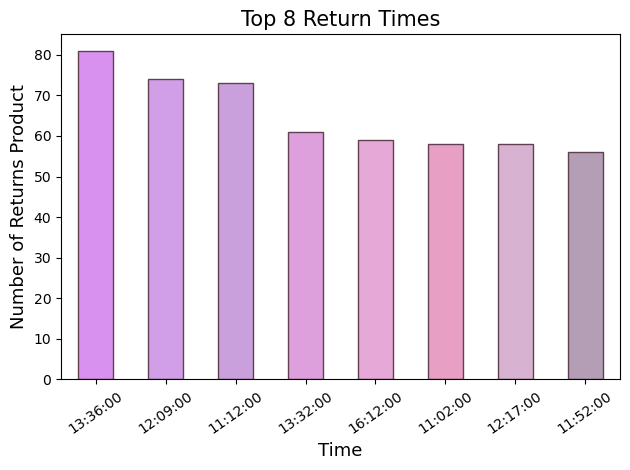

In [41]:
colors = ['#d891ef' ,'#d19fe8' , '#c9a0dc' ,'#dda0dd','#e6a8d7','#e79fc4' , '#d8b2d1' , '#b39eb5']
most_products_returned.plot(kind='bar', color=colors , edgecolor = '#614051')
plt.title('Top 8 Return Times',fontsize = 15)
plt.xlabel('Time',fontsize = 13)
plt.ylabel('Number of Returns Product',fontsize = 13)
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


<h3>14) Seasonal sales trends</h3>

In [43]:
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month

In [44]:
def season (month):
    if month in[12,1,2]:
        return 'Winter'
    if month in [3,4,5]:
        return 'Spring'
    if month in [6,7,8]:
        return 'Summer'
    if month in [9,10,11]:
        return 'Autumn (Fall)'
    else:
        return False
df['Season'] = df['Month'].apply(season)

In [45]:
seasonal_sales = df.groupby('Season')['Total Income'].sum().sort_values(ascending=False)
print(seasonal_sales)

Season
Autumn (Fall)    3321473.423
Winter           2334459.878
Spring           1971752.023
Summer           1911799.310
Name: Total Income, dtype: float64


<h3>Seasonal Sales Trends</h3>

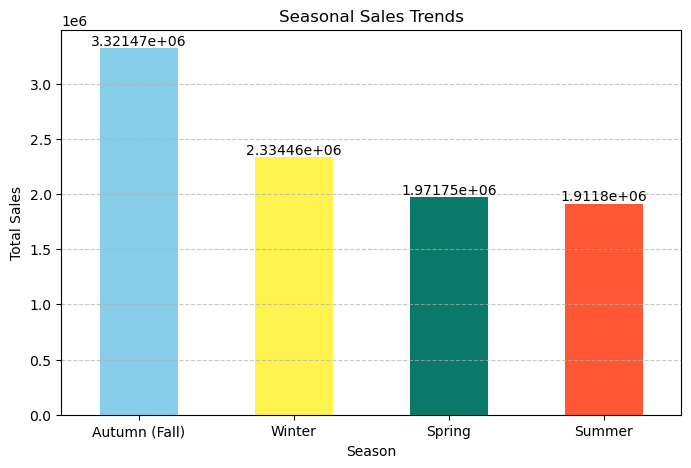

In [46]:
plt.figure(figsize=(8, 5))
data = seasonal_sales.plot(kind='bar', color=['skyblue','#FFF44F','#097969','#FF5733'])
plt.title('Seasonal Sales Trends')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in data.containers:
    data.bar_label(i)
plt.show()


<H3>15) What time of year do  sell the most?</H3>

In [47]:
sells_year = df.groupby('Month')[['Total Income']].sum().sort_values(by = 'Total Income' , ascending = False)

In [48]:
sells_year.head(1)

,Total Income
Month,
11,1422654.642


<h3>16) Relationship between sales and seasonal changes (Winter vs Summer Sales)</h3>

In [49]:
seasonal_sales = df[df['Season'].isin(['Winter', 'Summer'])]

In [50]:
seasonal_sales_summary = seasonal_sales.groupby('Season')['Total Income'].sum()

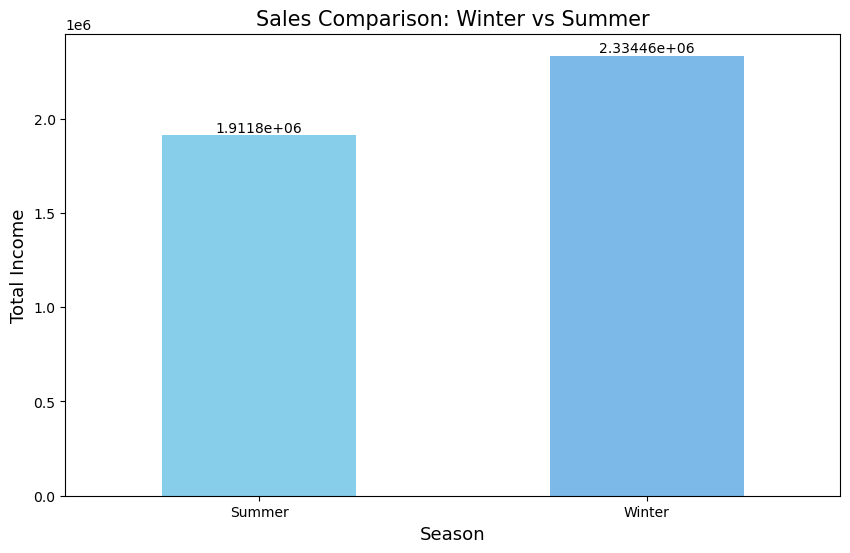

In [51]:
plt.figure(figsize=(10, 6))
data = seasonal_sales_summary.plot(kind='bar', color=['#87CEEB', '#7CB9E8'])
plt.title('Sales Comparison: Winter vs Summer', fontsize = 15)
plt.xlabel('Season',fontsize = 13)
plt.ylabel('Total Income',fontsize = 13)
plt.xticks(rotation = 0)
for i in data.containers:
    data.bar_label(i)
plt.show()

<h3>17)Which customer is buying the most products at the highest price?</h3>

In [52]:
highest_buying_customer = df.groupby('Customer ID')[['Total Income']].sum().sort_values(by = 'Total Income' , ascending = False)

In [53]:
highest_buying_customer.head(1)

,Total Income
Customer ID,
18102.0,394556.69


In [54]:
df[df['Customer ID'] == 18102.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Total Income,Data of Week,Time,Month,Season
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102.0,United Kingdom,2009-12,27.44,Tuesday,09:24:00,12,Winter
55,489438,21252,SET OF MEADOW FLOWER STICKERS,30,2009-12-01 09:24:00,1.69,18102.0,United Kingdom,2009-12,50.70,Tuesday,09:24:00,12,Winter
56,489438,21100,CHARLIE AND LOLA CHARLOTTE BAG,30,2009-12-01 09:24:00,1.15,18102.0,United Kingdom,2009-12,34.50,Tuesday,09:24:00,12,Winter
57,489438,21033,JUMBO BAG CHARLIE AND LOLA TOYS,30,2009-12-01 09:24:00,2.00,18102.0,United Kingdom,2009-12,60.00,Tuesday,09:24:00,12,Winter
58,489438,20711,JUMBO BAG TOYS,60,2009-12-01 09:24:00,1.30,18102.0,United Kingdom,2009-12,78.00,Tuesday,09:24:00,12,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519376,537659,21623,VINTAGE UNION JACK MEMOBOARD,600,2010-12-07 16:43:00,6.38,18102.0,United Kingdom,2010-12,3828.00,Tuesday,16:43:00,12,Winter
519377,537659,85064,CREAM SWEETHEART LETTER RACK,160,2010-12-07 16:43:00,3.88,18102.0,United Kingdom,2010-12,620.80,Tuesday,16:43:00,12,Winter
519378,537659,82484,WOOD BLACK BOARD ANT WHITE FINISH,600,2010-12-07 16:43:00,4.78,18102.0,United Kingdom,2010-12,2868.00,Tuesday,16:43:00,12,Winter
519379,537659,22833,HALL CABINET WITH 3 DRAWERS,72,2010-12-07 16:43:00,32.69,18102.0,United Kingdom,2010-12,2353.68,Tuesday,16:43:00,12,Winter


<h3>18) Average order quantity of customers in different countries</h3>

In [55]:
top_countries = df.groupby('Country')[['Total Income']].mean().sort_values(by = 'Total Income' , ascending = False)

In [56]:
top_countries

,Total Income
Country,
Denmark,109.749883
Netherlands,95.291950
Sweden,56.777727
Hong Kong,51.608684
Australia,45.950765
Israel,43.235135
Thailand,40.401842
Japan,37.660536
Bermuda,36.857059


<h4>Top 10 Countries with Highest Average Order Quantity</h4>

In [57]:
top_countries = df.groupby('Country')[['Total Income']].mean().sort_values(by = 'Total Income' , ascending = False).head(10)

<Figure size 1200x600 with 0 Axes>

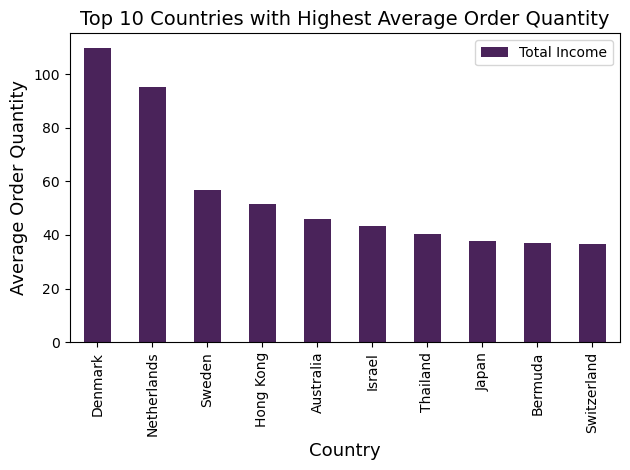

In [58]:
plt.figure(figsize=(12, 6))
top_countries.plot ( kind = 'bar' , color = ['#4a235a'])
plt.xlabel('Country',fontsize = 13)
plt.ylabel('Average Order Quantity', fontsize=13)
plt.title('Top 10 Countries with Highest Average Order Quantity', fontsize=14)
plt.tight_layout()
plt.show()


<h3>19) What products sell the most at what time of year?</h3>

In [59]:
df.groupby('Season')[['Total Income']].sum().sort_values(by= 'Total Income' , ascending = False).head(1)

,Total Income
Season,
Autumn (Fall),3321473.423


------------------------------------------------------------------------